# Tutorial 4 - NN using Pyspark

In [1]:
from pyspark.sql.types import *

* Move the file named as "HeightAndWeight_.csv" to hadoop inside the folder named as "user1" before next step.

In [2]:
customSchema = StructType([
    StructField("gender", StringType(), True), 
    StructField("height", IntegerType(), True), 
    StructField("weight", IntegerType(), True)])

df = spark.read.load('hdfs://localhost:9000/user1/HeightAndWeight_.csv', format="csv", header="true", sep=',', schema=customSchema)
df.printSchema()

root
 |-- gender: string (nullable = true)
 |-- height: integer (nullable = true)
 |-- weight: integer (nullable = true)



In [3]:
df.show(5)

+------+------+------+
|gender|height|weight|
+------+------+------+
|Female|    67|   150|
|Female|    65|   135|
|Female|    68|   130|
|  Male|    70|   160|
|Female|    70|   130|
+------+------+------+
only showing top 5 rows



In [4]:
from pyspark.sql import functions 

In [5]:
df = df.withColumn('gender',functions.when(df['gender']=='Female',0).otherwise(1))

In [6]:
df = df.select('height', 'weight', 'gender')

In [7]:
df.show()

+------+------+------+
|height|weight|gender|
+------+------+------+
|    67|   150|     0|
|    65|   135|     0|
|    68|   130|     0|
|    70|   160|     1|
|    70|   130|     0|
|    69|   174|     1|
|    65|   126|     1|
|    74|   188|     1|
|    60|   110|     0|
|    63|   125|     0|
|    70|   173|     1|
|    70|   145|     0|
|    68|   175|     1|
|    65|   123|     0|
|    71|   145|     1|
|    74|   160|     1|
|    64|   135|     0|
|    71|   175|     1|
|    67|   145|     1|
|    67|   130|     1|
+------+------+------+
only showing top 20 rows



In [8]:
import numpy as np

In [9]:
df.select("height", "weight", "gender").collect()

[Row(height=67, weight=150, gender=0),
 Row(height=65, weight=135, gender=0),
 Row(height=68, weight=130, gender=0),
 Row(height=70, weight=160, gender=1),
 Row(height=70, weight=130, gender=0),
 Row(height=69, weight=174, gender=1),
 Row(height=65, weight=126, gender=1),
 Row(height=74, weight=188, gender=1),
 Row(height=60, weight=110, gender=0),
 Row(height=63, weight=125, gender=0),
 Row(height=70, weight=173, gender=1),
 Row(height=70, weight=145, gender=0),
 Row(height=68, weight=175, gender=1),
 Row(height=65, weight=123, gender=0),
 Row(height=71, weight=145, gender=1),
 Row(height=74, weight=160, gender=1),
 Row(height=64, weight=135, gender=0),
 Row(height=71, weight=175, gender=1),
 Row(height=67, weight=145, gender=1),
 Row(height=67, weight=130, gender=1),
 Row(height=70, weight=162, gender=1),
 Row(height=64, weight=107, gender=0),
 Row(height=70, weight=175, gender=1),
 Row(height=64, weight=130, gender=1),
 Row(height=66, weight=163, gender=1),
 Row(height=63, weight=13

In [10]:
data_array =  np.array(df.select("height", "weight", "gender").collect())
data_array #view the array

array([[ 67, 150,   0],
       [ 65, 135,   0],
       [ 68, 130,   0],
       [ 70, 160,   1],
       [ 70, 130,   0],
       [ 69, 174,   1],
       [ 65, 126,   1],
       [ 74, 188,   1],
       [ 60, 110,   0],
       [ 63, 125,   0],
       [ 70, 173,   1],
       [ 70, 145,   0],
       [ 68, 175,   1],
       [ 65, 123,   0],
       [ 71, 145,   1],
       [ 74, 160,   1],
       [ 64, 135,   0],
       [ 71, 175,   1],
       [ 67, 145,   1],
       [ 67, 130,   1],
       [ 70, 162,   1],
       [ 64, 107,   0],
       [ 70, 175,   1],
       [ 64, 130,   1],
       [ 66, 163,   1],
       [ 63, 137,   0],
       [ 65, 165,   1],
       [ 65, 130,   0],
       [ 64, 109,   0]])

In [11]:
data_array.shape

(29, 3)

In [12]:
data_array[0]

array([ 67, 150,   0])

In [13]:
data_array[28]

array([ 64, 109,   0])

In [14]:
print(data_array.max(axis=0))
print(data_array.min(axis=0))

[ 74 188   1]
[ 60 107   0]


In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
min_x = data_array.min(axis=0)[0]-10
max_x = data_array.max(axis=0)[0]+10
min_y = data_array.min(axis=0)[1]-10
max_y = data_array.max(axis=0)[1]+10

print(min_x, max_x, min_y, max_y)

50 84 97 198


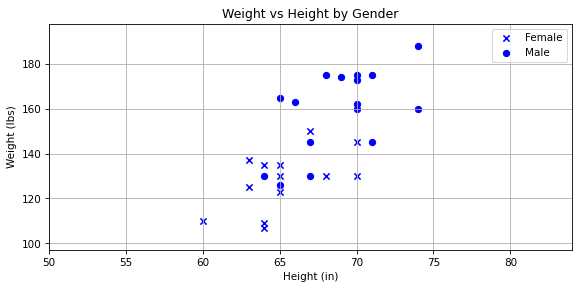

In [17]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value = data_array[i]
    # assign labels values to specific matrix elements
    gender = value[2]
    height = value[0]
    weight = value[1]
    
    # filter data points by gender
    a = plt.scatter(height[gender==0],weight[gender==0], marker = 'x', c= 'b', label = 'Female')
    b = plt.scatter(height[gender==1],weight[gender==1], marker = 'o', c= 'b', label = 'Male')
    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[a,b])
    

In [18]:
np.random.seed(12345)

In [19]:
w1 = np.random.randn()
w2 = np.random.randn()
b= np.random.randn()

In [20]:
print(w1, w2, b)

-0.20470765948471295 0.47894333805754824 -0.5194387150567381


In [21]:
X = data_array[:,:2]
y = data_array[:,2]
print(X,y)

[[ 67 150]
 [ 65 135]
 [ 68 130]
 [ 70 160]
 [ 70 130]
 [ 69 174]
 [ 65 126]
 [ 74 188]
 [ 60 110]
 [ 63 125]
 [ 70 173]
 [ 70 145]
 [ 68 175]
 [ 65 123]
 [ 71 145]
 [ 74 160]
 [ 64 135]
 [ 71 175]
 [ 67 145]
 [ 67 130]
 [ 70 162]
 [ 64 107]
 [ 70 175]
 [ 64 130]
 [ 66 163]
 [ 63 137]
 [ 65 165]
 [ 65 130]
 [ 64 109]] [0 0 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0]


In [22]:
x_mean = X.mean(axis=0)
x_std = X.std(axis=0)
print(x_mean, x_std)

[ 67.20689655 145.24137931] [ 3.35671545 22.1743175 ]


In [23]:
def normalize(X):
    x_mean = X.mean(axis=0)
    x_std = X.std(axis=0)
    X = (X - X.mean(axis=0))/X.std(axis=0)
    return X

In [24]:
X = normalize(X)
print(X)

[[-0.06163661  0.21460055]
 [-0.65745714 -0.4618577 ]
 [ 0.23627366 -0.68734378]
 [ 0.8320942   0.66557271]
 [ 0.8320942  -0.68734378]
 [ 0.53418393  1.29693375]
 [-0.65745714 -0.86773265]
 [ 2.02373527  1.92829478]
 [-2.14700848 -1.58928812]
 [-1.25327768 -0.91282987]
 [ 0.8320942   1.25183653]
 [ 0.8320942  -0.01088554]
 [ 0.23627366  1.34203096]
 [-0.65745714 -1.0030243 ]
 [ 1.13000446 -0.01088554]
 [ 2.02373527  0.66557271]
 [-0.95536741 -0.4618577 ]
 [ 1.13000446  1.34203096]
 [-0.06163661 -0.01088554]
 [-0.06163661 -0.68734378]
 [ 0.8320942   0.75576715]
 [-0.95536741 -1.72457977]
 [ 0.8320942   1.34203096]
 [-0.95536741 -0.68734378]
 [-0.35954687  0.80086436]
 [-1.25327768 -0.37166327]
 [-0.65745714  0.8910588 ]
 [-0.65745714 -0.68734378]
 [-0.95536741 -1.63438533]]


In [25]:
print('standard deviation')
print(round(X[:,0].std(axis=0),0))
print('mean')
print(round(X[:,0].mean(axis=0),0))

standard deviation
1.0
mean
-0.0


In [26]:
data_array = np.column_stack((X[:,0], X[:,1],y))
print(data_array)

[[-0.06163661  0.21460055  0.        ]
 [-0.65745714 -0.4618577   0.        ]
 [ 0.23627366 -0.68734378  0.        ]
 [ 0.8320942   0.66557271  1.        ]
 [ 0.8320942  -0.68734378  0.        ]
 [ 0.53418393  1.29693375  1.        ]
 [-0.65745714 -0.86773265  1.        ]
 [ 2.02373527  1.92829478  1.        ]
 [-2.14700848 -1.58928812  0.        ]
 [-1.25327768 -0.91282987  0.        ]
 [ 0.8320942   1.25183653  1.        ]
 [ 0.8320942  -0.01088554  0.        ]
 [ 0.23627366  1.34203096  1.        ]
 [-0.65745714 -1.0030243   0.        ]
 [ 1.13000446 -0.01088554  1.        ]
 [ 2.02373527  0.66557271  1.        ]
 [-0.95536741 -0.4618577   0.        ]
 [ 1.13000446  1.34203096  1.        ]
 [-0.06163661 -0.01088554  1.        ]
 [-0.06163661 -0.68734378  1.        ]
 [ 0.8320942   0.75576715  1.        ]
 [-0.95536741 -1.72457977  0.        ]
 [ 0.8320942   1.34203096  1.        ]
 [-0.95536741 -0.68734378  1.        ]
 [-0.35954687  0.80086436  1.        ]
 [-1.25327768 -0.37166327

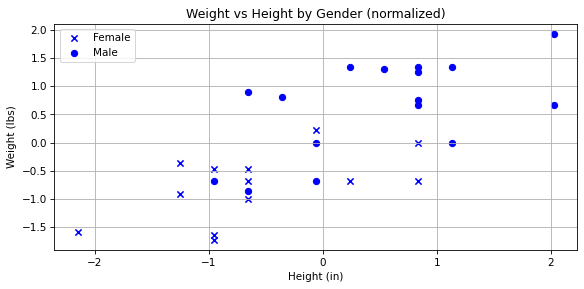

In [27]:
# formatting the plot grid, scales, and figure size
plt.figure(figsize=(9, 4), dpi= 75)
# plt.axis([min_x,max_x,min_y,max_y])
plt.grid()
for i in range(len(data_array)):
    value_n = data_array[i]
    # assign labels values to specific matrix elements
    gender_n = value_n[2]
    height_n = value_n[0]
    weight_n = value_n[1]
    an = plt.scatter(height_n[gender_n==0.0],weight_n[gender_n==0.0], marker = 'x', c= 'b', label = 'Female')
    bn = plt.scatter(height_n[gender_n==1.0],weight_n[gender_n==1.0], marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender (normalized)')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[an,bn])


In [28]:
def sigmoid(input):
    return 1/(1+np.exp(-input))

In [29]:
X = np.arange(-10,10,1)
Y = sigmoid(X)

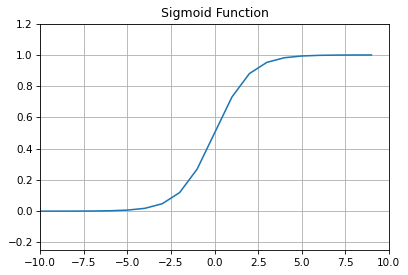

In [30]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
plt.plot(X,Y)
plt.title('Sigmoid Function')
plt.show()

In [31]:
def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

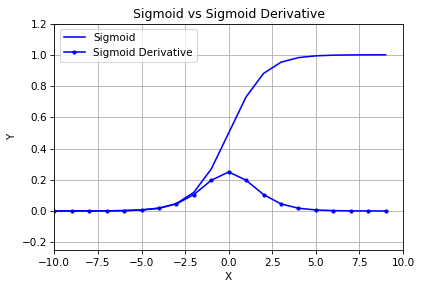

In [32]:
plt.figure(figsize=(6, 4), dpi= 75)
plt.axis([-10,10,-0.25,1.2])
plt.grid()
X = np.arange(-10,10,1)
Y = sigmoid(X)
Y_Prime = sigmoid_derivative(X)
plt.plot(X, Y, label="Sigmoid",c='b')
plt.plot(X, Y_Prime, marker=".", label="Sigmoid Derivative", c='b')
plt.title('Sigmoid vs Sigmoid Derivative')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [33]:
data_array.shape

(29, 3)

In [34]:
for i in range(100):
    random_index = np.random.randint(len(data_array))
    point = data_array[random_index]
    print(i, point)

0 [0.53418393 1.29693375 1.        ]
1 [ 0.23627366 -0.68734378  0.        ]
2 [-0.65745714 -0.4618577   0.        ]
3 [0.8320942  1.34203096 1.        ]
4 [1.13000446 1.34203096 1.        ]
5 [-0.65745714 -0.68734378  0.        ]
6 [ 1.13000446 -0.01088554  1.        ]
7 [-1.25327768 -0.91282987  0.        ]
8 [-0.65745714 -0.68734378  0.        ]
9 [-0.95536741 -0.68734378  1.        ]
10 [0.8320942  1.34203096 1.        ]
11 [-0.95536741 -0.4618577   0.        ]
12 [-0.06163661 -0.01088554  1.        ]
13 [-1.25327768 -0.91282987  0.        ]
14 [ 0.8320942  -0.01088554  0.        ]
15 [-0.65745714 -1.0030243   0.        ]
16 [0.8320942  1.25183653 1.        ]
17 [1.13000446 1.34203096 1.        ]
18 [-0.06163661 -0.01088554  1.        ]
19 [-0.65745714 -0.86773265  1.        ]
20 [2.02373527 1.92829478 1.        ]
21 [ 0.8320942  -0.01088554  0.        ]
22 [2.02373527 1.92829478 1.        ]
23 [-0.95536741 -0.68734378  1.        ]
24 [-0.35954687  0.80086436  1.        ]
25 [-0.95

In [35]:
learning_rate = 0.1

all_costs = []

for i in range(100000):
    # set the random data points that will be used to calculate the summation
    random_number = np.random.randint(len(data_array))
    random_person = data_array[random_number]
    
    # the height and weight from the random individual are selected
    height = random_person[0]
    weight = random_person[1]

    z = w1*height+w2*weight+b
    predictedGender = sigmoid(z)
    
    actualGender = random_person[2]
    
    cost = (predictedGender-actualGender)**2
    
    # the cost value is appended to the list
    all_costs.append(cost)
    
    # partial derivatives of the cost function and summation are calculated
    dcost_predictedGender = 2 * (predictedGender-actualGender)
    dpredictedGenger_dz = sigmoid_derivative(z)
    dz_dw1 = height
    dz_dw2 = weight
    dz_db = 1
    
    dcost_dw1 = dcost_predictedGender * dpredictedGenger_dz * dz_dw1
    dcost_dw2 = dcost_predictedGender * dpredictedGenger_dz * dz_dw2
    dcost_db  = dcost_predictedGender * dpredictedGenger_dz * dz_db
    
    # gradient descent calculation
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    b  = b  - learning_rate * dcost_db

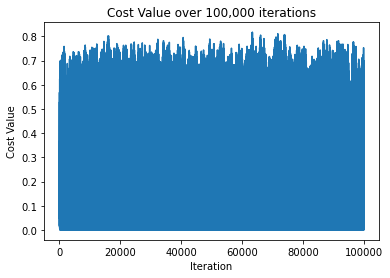

In [36]:
plt.plot(all_costs)
plt.title('Cost Value over 100,000 iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost Value')
plt.show()

In [37]:
print('The final values of w1, w2, and b')
print('---------------------------------')
print('w1 = {}'.format(w1))
print('w2 = {}'.format(w2))
print('b  = {}'.format(b))

The final values of w1, w2, and b
---------------------------------
w1 = 0.42782676841396
w2 = 1.8977551930027234
b  = 0.22502456985982955


In [38]:
for i in range(len(data_array)):
    random_individual = data_array[i]
    height = random_individual[0]
    weight = random_individual[1]
    z = height*w1 + weight*w2 + b
    predictedGender=sigmoid(z)
    print("Individual #{} actual score: {} predicted score: {}"
          .format(i+1,random_individual[2],predictedGender))

Individual #1 actual score: 0.0 predicted score: 0.6470081869541952
Individual #2 actual score: 0.0 predicted score: 0.2823679335558656
Individual #3 actual score: 0.0 predicted score: 0.2732289391563533
Individual #4 actual score: 1.0 predicted score: 0.8634341613750248
Individual #5 actual score: 0.0 predicted score: 0.32664615025385485
Individual #6 actual score: 1.0 predicted score: 0.948574467530227
Individual #7 actual score: 1.0 predicted score: 0.15407420064539062
Individual #8 actual score: 1.0 predicted score: 0.9914247603624445
Individual #9 actual score: 0.0 predicted score: 0.023901952077314957
Individual #10 actual score: 0.0 predicted score: 0.11471195792273974
Individual #11 actual score: 1.0 predicted score: 0.9505790084513505
Individual #12 actual score: 0.0 predicted score: 0.6365355232635158
Individual #13 actual score: 1.0 predicted score: 0.9464931979550331
Individual #14 actual score: 0.0 predicted score: 0.12349434717153822
Individual #15 actual score: 1.0 predi

In [39]:
def input_normalize(height, weight):
    inputHeight = (height - x_mean[0])/x_std[0]
    inputWeight = (weight - x_mean[1])/x_std[1]
    return inputHeight, inputWeight

In [40]:
score = input_normalize(70, 180)

In [41]:
def predict_gender(raw_score):
    gender_summation = raw_score[0]*w1 + raw_score[1]*w2 + b
    gender_score = sigmoid(gender_summation)
    if gender_score <= 0.5:
        gender = 'Female'
    else:
        gender = 'Male'
    return gender, gender_score

In [42]:
predict_gender(score)

('Male', 0.9722338944801183)

In [43]:
score = input_normalize(50,120)

In [44]:
predict_gender(score)

('Female', 0.01585469303508635)

In [45]:
x_min = min(data_array[:,0])-0.1
x_max = max(data_array[:,0])+0.1
y_min = min(data_array[:,1])-0.1
y_max = max(data_array[:,1])+0.1
increment= 0.05
print(x_min, x_max, y_min, y_max)

-2.24700848158745 2.1237352673336227 -1.8245797669033634 2.028294779946051


In [46]:
x_data= np.arange(x_min, x_max, increment)

In [47]:
y_data= np.arange(y_min, y_max, increment)

In [48]:
xy_data = [[x_all, y_all] for x_all in x_data for y_all in y_data]

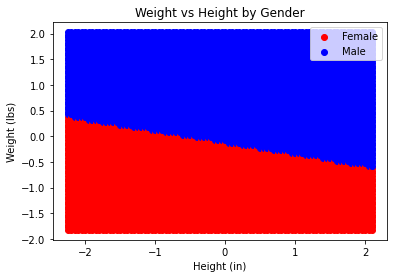

In [49]:
for i in range(len(xy_data)):
    data = (xy_data[i])
    height = data[0]
    weight = data[1]  
    z_new = height*w1 + weight*w2 + b
    predictedGender_new=sigmoid(z_new)
    # print(height, weight, predictedGender_new)
    ax = plt.scatter(height[predictedGender_new<=0.5],
                     weight[predictedGender_new<=0.5], 
                     marker = 'o', c= 'r', label = 'Female')
    bx = plt.scatter(height[predictedGender_new > 0.5],
                     weight[predictedGender_new>0.5], 
                     marker = 'o', c= 'b', label = 'Male')    
    # plot values, title, legend, x and y axis
    plt.title('Weight vs Height by Gender')
    plt.xlabel('Height (in)')
    plt.ylabel('Weight (lbs)')
    plt.legend(handles=[ax,bx])

## References:
* Chapter No. 2, Apache Spark Deep Learning Cookbook, Ahmed Sherif, Amrith Ravindra, Packt Publishing, 12 Jul 2018.